# Thermolysin ligands for pharmacophore identification

We explore thrombing ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

Smiles PDBID LigID
0                     CC(C)C[C@H](C(=O)OC)N(C(=O)C)O  7TLN   INC
1  C[C@@H](C(=O)NCC(=O)Nc1ccc(cc1)[N+](=O)[O-])NC...  5TLN   BAN
2                    c1ccc(cc1)C[C@H](CC(=O)O)C(=O)O  1HYT   BZS

In [3]:
def load_mols_from_sdf():
    """ Load ligands from sdf files in this directory.
    """
    mols = []
    legends = []
    for root, dirs, filenames in os.walk("./"):
        for file in filenames:
            if file.endswith(".sdf"):
                supp = Chem.SDMolSupplier(file)
                mol = next(supp)
                mol.RemoveAllConformers()
                mols.append(mol)
                
                legends.append(file.split(".")[0])
    
    return mols, legends

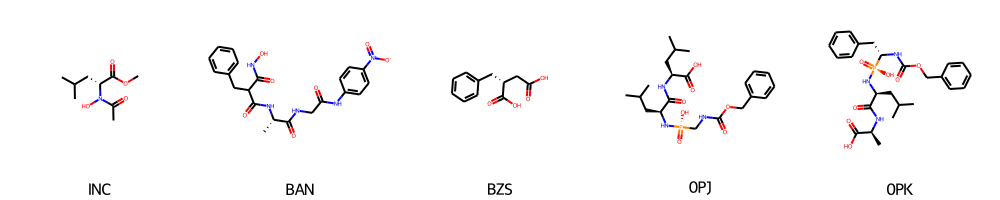

In [4]:
ligs_1 = [
    Chem.MolFromSmiles(smi.encode("unicode_escape")) for smi in lig_df["Smiles"]
]
legends_1 = [l for l in lig_df["LigID"]]

ligs_2, legends_2 = load_mols_from_sdf()

ligands = ligs_1 + ligs_2
legends = legends_1 + legends_2
assert all([l is not None for l in ligands])

Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=5)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [5]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [7]:
pharmacophore.generate_conformers()
print([l.GetNumConformers() for l in pharmacophore.ligands])

[54, 184, 20, 289, 272]


## View 3D structures

In [8]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

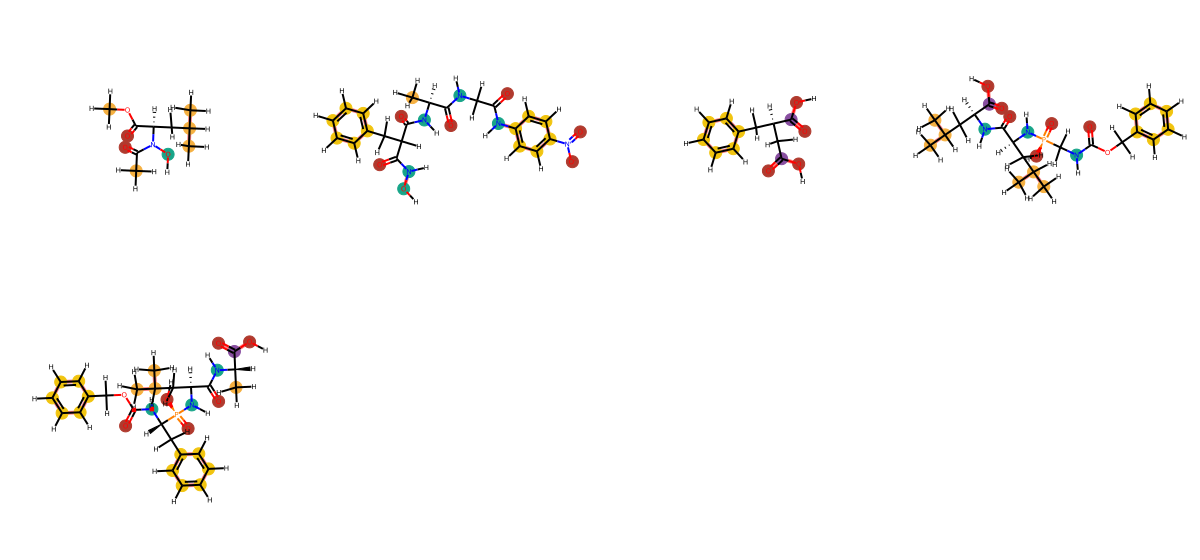

In [9]:
pharmacophore.find_chem_feats()
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm

### Finding 5-Point Pharmacophores

In [14]:
min_actives = len(pharmacophore.ligands) - 2
n_points = 5

In [15]:
pharmacophore.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)
print(f"Found {len(pharmacophore)} common pharmacophores")

Found 10 common pharmacophores


In [16]:
pharmacophore.show(0)

NGLWidget()

### Finding 4-Point Pharmacophores

In [18]:
min_actives = len(pharmacophore.ligands) - 1
n_points = 4

pharma_4 = oph.LigandBasedPharmacophore()
pharma_4.ligands = pharmacophore.ligands
pharma_4.find_chem_feats()
pharma_4.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_4)} common pharmacophores")

Found 10 common pharmacophores


In [19]:
pharma_4.show()

NGLWidget()

### Finding 3-Point Pharmacophores

In [20]:
min_actives = len(pharmacophore.ligands)
n_points = 3

pharma_3 = oph.LigandBasedPharmacophore()
pharma_3.ligands = pharmacophore.ligands
pharma_3.find_chem_feats()
pharma_3.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_3)} common pharmacophores")

Found 10 common pharmacophores


In [21]:
pharma_3.show(0)

NGLWidget()